# Case 1 - Coronary Heart Disease
Neural Networks for Health Technology Applications<br>
02.02.2020, Augustine Igbinidu-Uwuigbe & Mai Vu<br>
Metropolia University of Applied Sciences<br><br>

## Contents
<ol>
    <li>Background</li>
    <li>Data Analysis</li>
    <li>Models and Training</li>
    <li>Results</li>
    <li>Conclusions</li>
    <li>References</li>
</ol>

## 1. Background

<div style="text-align: justify">This report shows the process of handling the patients' heart condition data collected by Cleveland Clinic Foundation, V.A. Medical Center in CA, and University Hospital, Zurich in Switzerland. The goal is to classify the patients' heart disease based on available data with high accuracy using the neural network application provided by the TensorFlow library. To achieve that, it is important to deeply understand, carefully analyze the data to come up with appropriate neural network architectures. All data from the above institutions are combined into a bigger dataset which is examined as parts of data preprocessing before applying different neural network structures. The results of each model and conclusions are also mentioned in this report.<div>

## 2. Data Analysis and Normalization

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.preprocessing import MinMaxScaler

# Install TensorFlow
try:
    
  # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.__version__

'2.0.0'

In [8]:
#First, import necessary libraries for the whole process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [88]:
X = pd.read_csv('processed.cleveland.data',header = None,encoding = "ISO-8859-1",na_values=['?'])
col_rename = {0 : 'age', 1 : 'sex', 2 : 'cp', 3 : 'trestbps', 4 : 'chol', 5 : 'fbs', 6 : 'restecg', 7 : 'thalach', 
              8 : 'exang', 9 : 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}
X = X.rename(columns = col_rename)
print('Shape =', X.shape)
print('Number of NaN values =', X.isna().sum().sum())
X.sample(10) #take 10 random rows from X

Shape = (303, 14)
Number of NaN values = 6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
253,51.0,0.0,3.0,120.0,295.0,0.0,2.0,157.0,0.0,0.6,1.0,0.0,3.0,0
161,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4
178,43.0,1.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0,0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
226,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0,0
190,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
65,60.0,1.0,4.0,145.0,282.0,0.0,2.0,142.0,1.0,2.8,2.0,2.0,7.0,2
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2


The output shows a 2-dimension data frame whose shape is (303, 14), meaning there are 303 patients and 14 attributes. The table below is the explanation for each attributes.

|**No.**| **Name** | **Definition** |
|:--|:---------|:-----|
|1  | age      | age in years|
|2  | sex      | sex (1 = male; 0 = female) |
|3  | cp       | chest pain type (4 classes) |
|4  | trestbps | resting blood pressure (in mm Hg) |
|5  | chol     | serum cholestoral in mg/dl |
|6  | fbs      | (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) |
|7  | restecg  | resting electrocardiographic results (3 classes) |
|8  | thalach  | maximum heart rate achieved |
|9  | exang    | exercise induced angina (1 = yes; 0 = no) |
|10 | oldpeak  | ST depression induced by exercise relative to rest |
|11 | slope    | the slope of the peak exercise ST segment (3 classes) |
|12 | ca       | number of major vessels (0-3) colored by flourosopy |
|13 | thal     | 3 = normal; 6 = fixed defect; 7 = reversable defect |
|14 | num      | diagnosis of heart disease |

<div style="text-align: justify">The goal is to predict the last attribute which can have any value from 0 (= absence) to 4. The output also includes 10 samples drawing from the dataset. Noted, the missing values (<b>?</b>) are replaced with <b>NaN</b> values. There are total 6 missing values in the Cleveland data (4 from the <b>ca</b> column and other 2 from the <b>thal</b> column which are classification attributes). Missing values are filled by the median of its column.</div>

In [89]:
X = X.fillna(X.median())
print('Number of NaN values =', X.isna().sum().sum())

Number of NaN values = 0


In [90]:
X.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000,303.000,303.000,303.00,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.439,0.680,3.158,131.69,246.693,0.149,0.990,149.607,0.327,1.040,1.601,0.663,4.723,0.937
std,9.039,0.467,0.960,17.60,51.777,0.356,0.995,22.875,0.470,1.161,0.616,0.934,1.938,1.229
min,29.000,0.000,1.000,94.00,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000,3.000,0.000
25%,48.000,0.000,3.000,120.00,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,3.000,0.000
50%,56.000,1.000,3.000,130.00,241.000,0.000,1.000,153.000,0.000,0.800,2.000,0.000,3.000,0.000
75%,61.000,1.000,4.000,140.00,275.000,0.000,2.000,166.000,1.000,1.600,2.000,1.000,7.000,2.000
max,77.000,1.000,4.000,200.00,564.000,1.000,2.000,202.000,1.000,6.200,3.000,3.000,7.000,4.000


In [91]:
pf = pd.DataFrame(X)
pd.set_option('display.max_rows', 500)
pd.options.display.max_rows


500

In [92]:
pf.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [93]:
c = pf.drop(columns=['sex','fbs','restecg','exang'])
c

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,num
0,63.0,1.0,145.0,233.0,150.0,2.3,3.0,0.0,6.0,0
1,67.0,4.0,160.0,286.0,108.0,1.5,2.0,3.0,3.0,2
2,67.0,4.0,120.0,229.0,129.0,2.6,2.0,2.0,7.0,1
3,37.0,3.0,130.0,250.0,187.0,3.5,3.0,0.0,3.0,0
4,41.0,2.0,130.0,204.0,172.0,1.4,1.0,0.0,3.0,0
5,56.0,2.0,120.0,236.0,178.0,0.8,1.0,0.0,3.0,0
6,62.0,4.0,140.0,268.0,160.0,3.6,3.0,2.0,3.0,3
7,57.0,4.0,120.0,354.0,163.0,0.6,1.0,0.0,3.0,0
8,63.0,4.0,130.0,254.0,147.0,1.4,2.0,1.0,7.0,2
9,53.0,4.0,140.0,203.0,155.0,3.1,3.0,0.0,7.0,1


In [94]:
#Defining x_label and y_label
x = c.loc[:,'age':'thal']
y = 1.0*(c.loc[:, 'num'] > 0)

In [95]:
print(x.shape,y.shape)

(303, 9) (303,)


<div style="text-align: justify">The above statistics show some basic information about the dataset such as predicted attribute does not have a strong related to any others and its occurrences are unevenly distributed. Before </div>

In [107]:
#Diving data to 3 parts.(train_data,validation_data and test_data)
x_train = x.loc[0:149,:]
x_test = x.loc[250:,:]
x_val = x.loc[150:250,:]
y_train = y.loc[0:149]
y_test = y.loc[250:]
y_val = y.loc[150:250]

In [108]:
#Normalizing the DataFrame
x_train = np.array(x_train)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_val_minmax = min_max_scaler.fit_transform(x_val)
x_test_minmax = min_max_scaler.fit_transform(x_test)

In [109]:
x_train_minmax.shape

(150, 9)

## Model and Training

In [126]:
model = Sequential()
model.add(Dense(64, activation='sigmoid',
            input_shape=(x_train_minmax.shape[1],)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [127]:
#converting the normal arrays to numpy arrays
x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_train_minmax = np.asarray(x_train_minmax)
y_train = np.asarray(y_train)
x_val_minmax = np.asarray(x_val_minmax)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [140]:
values = model.fit(x_train_minmax, y_train, epochs=50,batch_size=1,verbose=1,validation_data = (x_val_minmax, y_val))

Train on 150 samples, validate on 101 samples
Epoch 1/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.1542 - accuracy: 0.8333 - val_loss: 0.2392 - val_accuracy: 0.7426
Epoch 2/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.0703 - accuracy: 0.9200 - val_loss: 0.2230 - val_accuracy: 0.7624
Epoch 3/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.0520 - accuracy: 0.9400 - val_loss: 0.2214 - val_accuracy: 0.7723
Epoch 4/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.0491 - accuracy: 0.9533 - val_loss: 0.2109 - val_accuracy: 0.7624
Epoch 5/50
150/150 [==============================] - 0s 3ms/sample - loss: 0.0450 - accuracy: 0.9467 - val_loss: 0.2120 - val_accuracy: 0.7624
Epoch 6/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.0444 - accuracy: 0.9533 - val_loss: 0.2002 - val_accuracy: 0.7624
Epoch 7/50
150/150 [==============================] - 0s 3ms/sample - loss: 0.0417 - accur

In [137]:
import matplotlib.pyplot as plt

print(values.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [143]:
value = model.fit(x_test_minmax, y_test, epochs=50,batch_size=1,verbose=1)

Train on 53 samples
Epoch 1/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.2099 - accuracy: 0.7358
Epoch 2/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.1787 - accuracy: 0.7736
Epoch 3/50
53/53 [==============================] - 0s 3ms/sample - loss: 0.1647 - accuracy: 0.7736
Epoch 4/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.1580 - accuracy: 0.8113
Epoch 5/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.1567 - accuracy: 0.8302
Epoch 6/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.1453 - accuracy: 0.8113
Epoch 7/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.1364 - accuracy: 0.8302
Epoch 8/50
53/53 [==============================] - 0s 1ms/sample - loss: 0.1341 - accuracy: 0.8302
Epoch 9/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.1207 - accuracy: 0.8491
Epoch 10/50
53/53 [==============================] - 0s 2ms/sample - loss: 0.111

In [144]:
value.history.keys()

dict_keys(['loss', 'accuracy'])

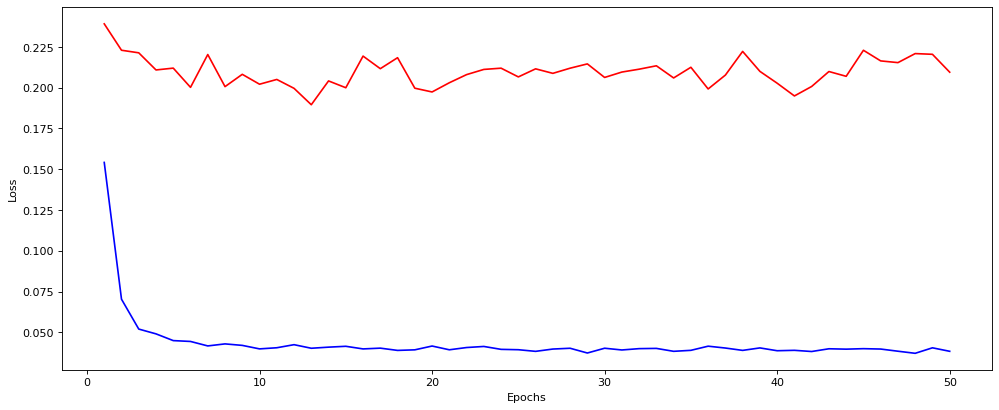

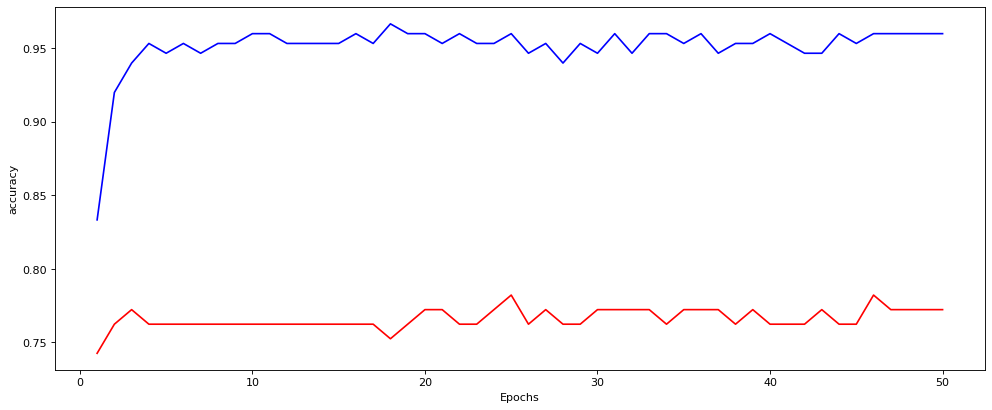

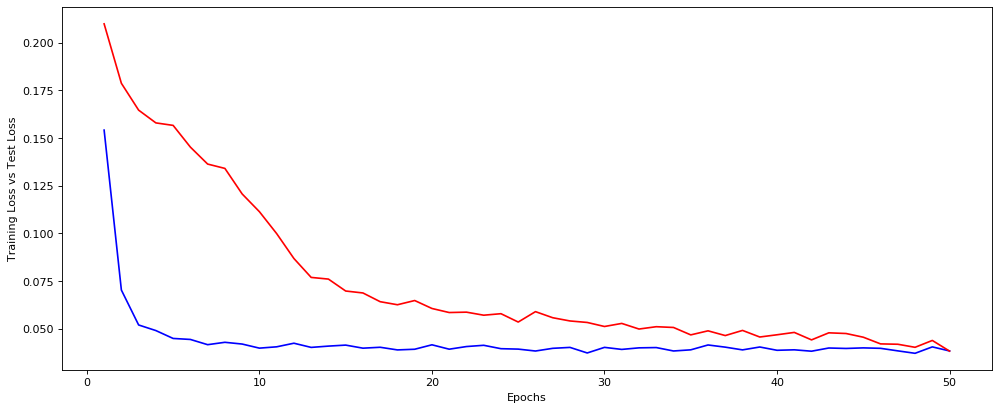

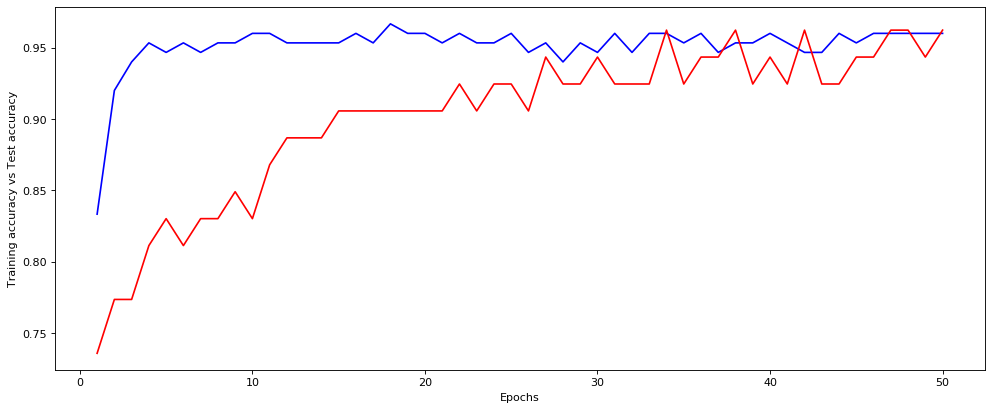

In [146]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
loss = values.history['loss']
val_loss = values.history['val_loss']
acc = values.history['accuracy']
val_acc = values.history['val_accuracy']
test_loss = value.history['loss']
test_acc = value.history['accuracy']

time = range(1,len(loss)+1)


plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time, acc, 'b-')
plt.plot(time, val_acc, 'r-')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time, loss, 'b-')
plt.plot(time, test_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Training Loss vs Test Loss')
plt.show()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time, acc, 'b-')
plt.plot(time, test_acc, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy vs Test accuracy')
plt.show()

## 4. Results

## 5. Conclusions

## 6. References

<ol>
<li>John Sullivan. Data Cleaning with Python and Pandas: Detecting Missing Values; 2018.<br>
URL: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b</li>
<li>Mohammed Sunasra. Performance Metrics for Classification problems in Machine Learning; 2017<br>
URL: https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b</li>
<li></li>
</ol>